In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
import seaborn as sns

ModuleNotFoundError: No module named 'seaborn'

In [56]:
def return_2d_chaos(func, x2,y2,x1=0,y1=0,N=50,T=10,ep=1e-3,dxdt=0,dydt=0,dt=.1):
    X = np.linspace(x1,x2,num=N)
    Y = np.linspace(y1,y2,num=N)
    #print(Y)
    grid = np.zeros((N,N))
    t_eval = np.arange(start=0,stop=T,step=dt)
    for i in range(len(X)):
        for j in range(len(Y)):
            x = X[i]
            y = Y[j]
            sol1 = solve_ivp(func,t_span=(0,T),y0=[x,y,dxdt,dydt],t_eval=t_eval)
            sol2 = solve_ivp(func,t_span=(0,T),y0=[x+ep,y+ep,dxdt,dydt],t_eval=t_eval)
            try:
                val = np.linalg.norm(sol1.y[0]-sol2.y[0])
            except:
                print("Fail")
                val =0
            grid[i][j] = val
            print(i,j)
    return grid

In [109]:
def return_2d_chaos_lyp(func, x2,y2,x1=0,y1=0,N=50,T=10,ep=1e-3,dxdt=0,dydt=0,dzdt =0, dt=.1,z=None, first_order=False):
    X = np.linspace(x1,x2,num=N)
    Y = np.linspace(y1,y2,num=N)
    #print(Y)
    grid = np.zeros((N,N))
    t_eval = np.arange(start=0,stop=T,step=dt)
    for i in range(len(X)):
        for j in range(len(Y)):
            x = X[i]
            y = Y[j]
            if z:
                if first_order:
                    y_n = [x,y,z]
                    y_p = [x+ep,y+ep,z]
                else:
                    y_n = [x,y,z,dxdt,dydt,dzdt]
                    y_p = [x+ep,y+ep,z,dxdt,dydt,dzdt]
            else:
                if first_order:
                    y_n = [x,y]
                    y_p = [x+ep,y+ep]
                else:
                    y_n = [x,y,dxdt,dydt]
                    y_p = [x+ep,y+ep,dxdt,dydt]
            sol1 = solve_ivp(func,t_span=(0,T),y0=y_n,t_eval=t_eval)
            sol2 = solve_ivp(func,t_span=(0,T),y0=y_p,t_eval=t_eval)
            try:
                # Lyapunov exponent averaged over time from separation growth in (x,y,z).
                d0 = np.linalg.norm([ep, ep, 0.0])
                dx = sol1.y[0] - sol2.y[0]
                dy = sol1.y[1] - sol2.y[1]
                if z:
                    dz = sol1.y[2] - sol2.y[2]
                else:
                    dz=0
                d_t = np.sqrt(dx * dx + dy * dy + dz * dz)
                d_t = np.maximum(d_t, 1e-12)
                logs = np.log(d_t / d0)
                val = (1.0 / T) * float(np.mean(logs[1:]))
            except:
                print("Fail")
                val =0
            grid[i][j] = val
            print(i,j)
    return grid

In [110]:
def func1(t,S):
    x,y,dxdt,dydt = S
    return [dxdt,dydt,x-y+np.sin(dxdt**2+y**2),x+y-np.cos(x**2+dydt**2)]
def func2(t,S):
    x,y,dxdt,dydt = S
    return [dxdt,dydt,x-y,x+y]
def func3(t,S):
    x,y,dxdt,dydt = S
    return [dxdt,dydt,x**2-y**2,x**2+y**2]

def func4(t,S):
    x,y,dxdt,dydt = S
    return [x**2+y**2-(dxdt**2+dydt**2),(dxdt**2+dydt**2)-(x**2+y**2),0,0]

#good
def func5(t,S):
    x,y,dxdt,dydt = S
    return [np.sin(x)-np.cos(y),np.sin(y)-np.cos(x),x,y]

def func5a(t,S):
    x,y,dxdt,dydt = S
    return [np.sin(x)-np.cos(y),np.sin(y)-np.cos(x),0,0]
def func5bdiff(t,S):
    x,y,dxdt,dydt = S
    return [dxdt,dydt,np.sin(x)-np.cos(y),np.sin(y)-np.cos(x)]

def func6(t,S):
    x,y,dxdt,dydt = S
    return [np.exp2(x**2)-np.exp2(y**2),np.sin(y**2)-np.cos(x**2),0,0]

def func7(t,S):
    x,y,dxdt,dydt = S
    return [dxdt,dydt,-10*np.sin(x),-10*np.cos(y)]

def lorenz_attractor(t,S):
    x,y,z,dxdt,dydt,dzdt = S
    sigma,rho,beta = 10,28,8/3
    return [sigma*(y-x),x*(rho-z)-y,x*y-beta*z,0,0,0]

def chua_rhs(t, state, alpha=15.6, beta=28.0, m0=-1.143, m1=-0.714):
    """
    Chua's circuit ODE (3D) with the standard piecewise-linear nonlinearity.

    state = [x, y, z]

    Params (common chaotic set):
      alpha=15.6, beta=28.0, m0=-1.143, m1=-0.714
    """
    x, y, z,dxdt,dydt,dzdt = state

    # Piecewise-linear Chua diode characteristic:
    # f(x) = m1*x + 0.5*(m0 - m1)*(|x+1| - |x-1|)
    fx = m1 * x + 0.5 * (m0 - m1) * (np.abs(x + 1.0) - np.abs(x - 1.0))

    dx = alpha * (y - x - fx)
    dy = x - y + z
    dz = -beta * y

    return np.array([dx, dy, dz,0,0,0], dtype=float)

def rossler_rhs(t, state, a=0.2, b=0.2, c=5.7):
    """
    Rössler system (3D).
    state = [x, y, z]

    Common chaotic parameters:
      a=0.2, b=0.2, c=5.7
    """
    x, y, z = state
    dx = -y - z
    dy = x + a * y
    dz = b + z * (x - c)
    return np.array([dx, dy, dz], dtype=float)


def duffing_rhs(t, state, delta=0.2, gamma=0.3, omega=1.2):
    """
    Forced Duffing oscillator (2D first-order form).
    state = [x, v] where v = dx/dt

    Equation: x'' + delta x' - x + x^3 = gamma cos(omega t)
    """
    x, v = state
    dx = v
    dv = x - x**3 - delta * v + gamma * np.cos(omega * t)
    return np.array([dx, dv], dtype=float)

In [125]:
arr_duff = return_2d_chaos_lyp(duffing_rhs,30,30,x1=-30,y1=-30,first_order=True,N=240)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


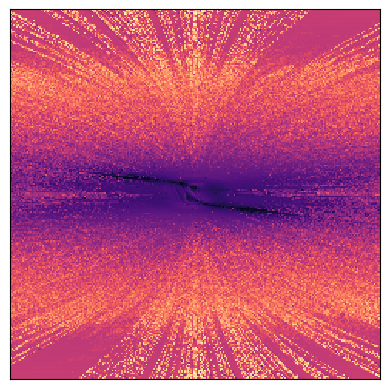

In [128]:
show_heatmap(blur_gaussian(arr_duff,sigma=.2),colorbar=False)

In [121]:
arr_rossler = return_2d_chaos_lyp(rossler_rhs,30,30,x1=-30,y1=-30,z=10,first_order=True,N=240)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


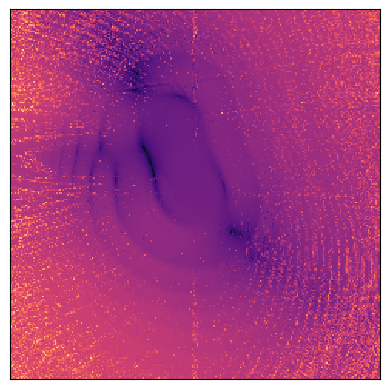

In [122]:
show_heatmap(arr_rossler,colorbar=False)

In [99]:
arr_chua = return_2d_chaos_lyp(chua_rhs,30,30,x1=-30,y1=-30,z=5,N=240)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


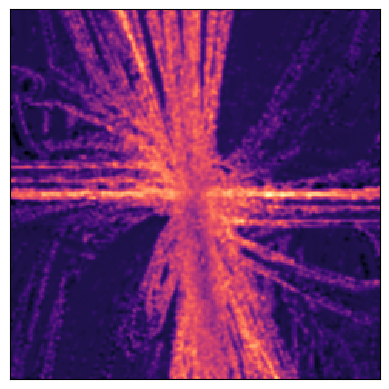

In [101]:
show_heatmap(blur_gaussian(arr_chua),cmap="magma",colorbar=False)

In [104]:
arr_lorenza = return_2d_chaos_lyp(lorenz_attractor,30,30,x1=-30,y1=-30,z=10,N=200)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


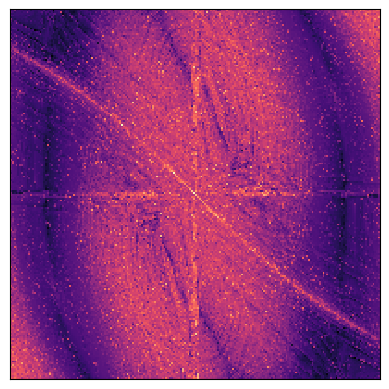

In [105]:
show_heatmap(arr_lorenza,colorbar=False)

In [61]:
arr7 = return_2d_chaos(func7,2*np.pi,2*np.pi,N=50)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9


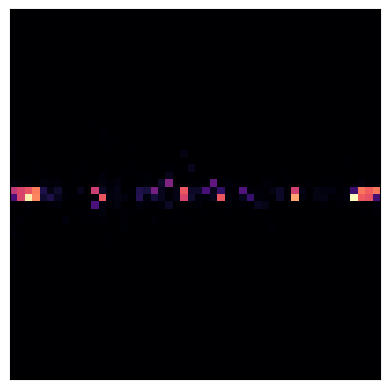

In [63]:
show_heatmap(arr7,colorbar=False)

In [66]:
arr = return_2d_chaos(func1,1,1)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9


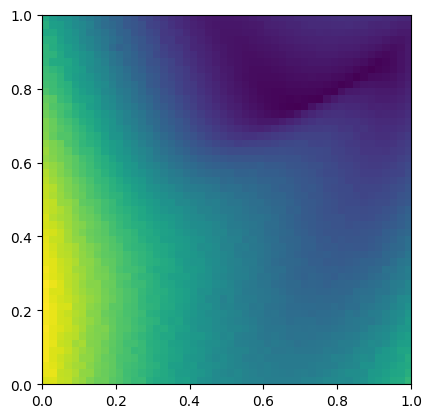

In [70]:
plt.imshow(arr,extent=[0,1,0,1])

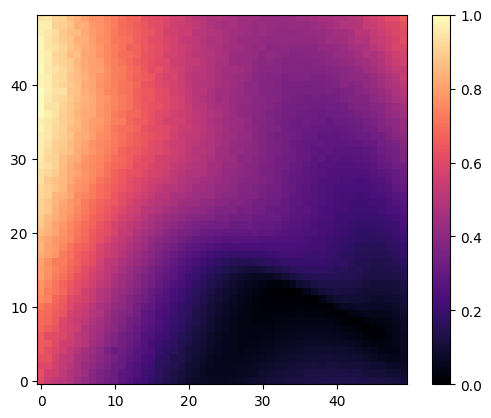

In [74]:
show_heatmap(normalize_image(arr))

In [124]:
arr2 = return_2d_chaos(func2,10,10,N=100)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
1 50
1 51
1 52
1 53
1 54
1 55
1 56
1 57
1 58
1 59
1 60
1 61
1 62
1 63
1 64
1 65
1 66
1 67
1 68
1 69
1 70
1 71
1 72
1 73
1 74
1 75
1 76
1 77
1 78
1 79
1 80
1 81
1 82
1 83
1 84
1 85
1 86
1 87
1 88
1 89
1 90
1 91
1 92
1 93
1 94
1 95
1 96
1 97
1 98
1 99
2 0
2 1
2 2
2 3
2 4


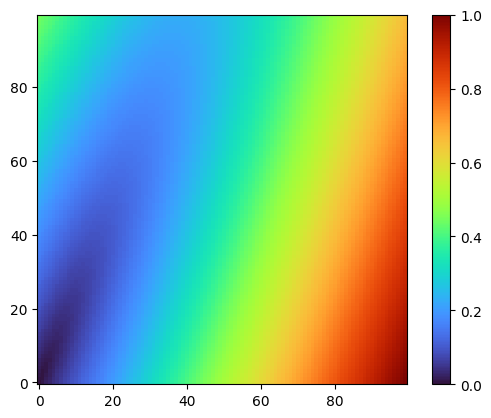

In [126]:
show_heatmap(normalize_image(arr2),cmap="turbo")

In [138]:
arr5 = return_2d_chaos(func5,16*np.pi,16*np.pi,N=200)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
0 50
0 51
0 52
0 53
0 54
0 55
0 56
0 57
0 58
0 59
0 60
0 61
0 62
0 63
0 64
0 65
0 66
0 67
0 68
0 69
0 70
0 71
0 72
0 73
0 74
0 75
0 76
0 77
0 78
0 79
0 80
0 81
0 82
0 83
0 84
0 85
0 86
0 87
0 88
0 89
0 90
0 91
0 92
0 93
0 94
0 95
0 96
0 97
0 98
0 99
0 100
0 101
0 102
0 103
0 104
0 105
0 106
0 107
0 108
0 109
0 110
0 111
0 112
0 113
0 114
0 115
0 116
0 117
0 118
0 119
0 120
0 121
0 122
0 123
0 124
0 125
0 126
0 127
0 128
0 129
0 130
0 131
0 132
0 133
0 134
0 135
0 136
0 137
0 138
0 139
0 140
0 141
0 142
0 143
0 144
0 145
0 146
0 147
0 148
0 149
0 150
0 151
0 152
0 153
0 154
0 155
0 156
0 157
0 158
0 159
0 160
0 161
0 162
0 163
0 164
0 165
0 166
0 167
0 168
0 169
0 170
0 171
0 172
0 173
0 174
0 175
0 176
0 177
0 178
0 179
0 180
0 181
0 182
0 183
0 184


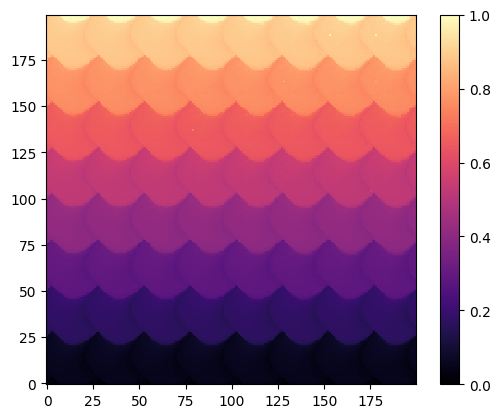

In [139]:
show_heatmap(normalize_image(arr5))

In [37]:
arr5b = return_2d_chaos(func5bdiff,1,1,N=50)

0 0
0 1
0 2
0 3
0 4
0 5
0 6
0 7
0 8
0 9
0 10
0 11
0 12
0 13
0 14
0 15
0 16
0 17
0 18
0 19
0 20
0 21
0 22
0 23
0 24
0 25
0 26
0 27
0 28
0 29
0 30
0 31
0 32
0 33
0 34
0 35
0 36
0 37
0 38
0 39
0 40
0 41
0 42
0 43
0 44
0 45
0 46
0 47
0 48
0 49
1 0
1 1
1 2
1 3
1 4
1 5
1 6
1 7
1 8
1 9
1 10
1 11
1 12
1 13
1 14
1 15
1 16
1 17
1 18
1 19
1 20
1 21
1 22
1 23
1 24
1 25
1 26
1 27
1 28
1 29
1 30
1 31
1 32
1 33
1 34
1 35
1 36
1 37
1 38
1 39
1 40
1 41
1 42
1 43
1 44
1 45
1 46
1 47
1 48
1 49
2 0
2 1
2 2
2 3
2 4
2 5
2 6
2 7
2 8
2 9
2 10
2 11
2 12
2 13
2 14
2 15
2 16
2 17
2 18
2 19
2 20
2 21
2 22
2 23
2 24
2 25
2 26
2 27
2 28
2 29
2 30
2 31
2 32
2 33
2 34
2 35
2 36
2 37
2 38
2 39
2 40
2 41
2 42
2 43
2 44
2 45
2 46
2 47
2 48
2 49
3 0
3 1
3 2
3 3
3 4
3 5
3 6
3 7
3 8
3 9
3 10
3 11
3 12
3 13
3 14
3 15
3 16
3 17
3 18
3 19
3 20
3 21
3 22
3 23
3 24
3 25
3 26
3 27
3 28
3 29
3 30
3 31
3 32
3 33
3 34
3 35
3 36
3 37
3 38
3 39
3 40
3 41
3 42
3 43
3 44
3 45
3 46
3 47
3 48
3 49
4 0
4 1
4 2
4 3
4 4
4 5
4 6
4 7
4 8
4 9


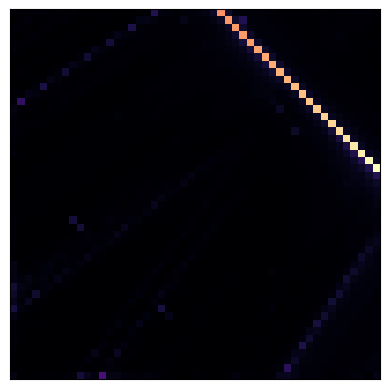

In [38]:
show_heatmap(arr5b,cmap="magma",colorbar=False)

In [21]:
# Matplotlib colormaps (short descriptions for fractals)
COLORMAPS = {
    "magma": "Perceptually uniform, dark -> bright; great for depth and contrast.",
    "inferno": "Hot, high contrast; reveals fine structure in dense regions.",
    "plasma": "Vivid warm palette; highlights gradients without harsh bands.",
    "viridis": "Balanced, colorblind-friendly; smooth gradient across values.",
    "cividis": "Low-contrast, colorblind-friendly; good for subtle shading.",
    "twilight": "Cyclic; ideal for phase/angle data (wraps smoothly).",
    "twilight_shifted": "Cyclic with shifted midpoint; helps center phase maps.",
    "hsv": "Cyclic but not perceptually uniform; dramatic for phase effects.",
    "cubehelix": "Monotonic luminance; good for printing and depth cues.",
    "turbo": "Vivid rainbow-like; use for impact, may introduce visual bias.",
}

# Matplotlib has no plt.heatmap; use imshow/pcolormesh as a heatmap.
def show_heatmap(data, cmap="magma", interpolation="nearest", origin="lower",
                 aspect="equal", colorbar=True, title=None):
    """Heatmap helper using imshow for 2D arrays.

    Parameters:
        data: 2D numpy array
        cmap: colormap name (see COLORMAPS)
        interpolation: e.g. "nearest", "bilinear", "bicubic"
        origin: "lower" for math-style coordinates, "upper" for image-style
        aspect: "equal" keeps square pixels; "auto" stretches
        colorbar: add colorbar if True
        title: optional plot title
    """
    plt.figure()
    im = plt.imshow(data, cmap=cmap, interpolation=interpolation,
                    origin=origin, aspect=aspect)
    if colorbar:
        plt.colorbar(im)
    if title:
        plt.title(title)
    plt.xticks([])
    plt.yticks([])
    return im

# Image editing + blur helpers (for smoothing/fractal post-processing)
from scipy.ndimage import gaussian_filter, uniform_filter, median_filter, sobel, laplace

def normalize_image(img, eps=1e-12):
    """Scale to [0, 1] for stable visualization."""
    img = img.astype(float)
    return (img - img.min()) / (img.max() - img.min() + eps)

def blur_gaussian(img, sigma=1.0):
    """Soft blur; higher sigma = smoother."""
    return gaussian_filter(img, sigma=sigma)

def blur_box(img, size=3):
    """Fast uniform blur; size is kernel width."""
    return uniform_filter(img, size=size)

def blur_median(img, size=3):
    """Edge-preserving blur; reduces speckle without smearing edges too much."""
    return median_filter(img, size=size)

def edge_enhance(img, amount=1.0):
    """Unsharp mask via Laplacian; amount > 0 increases edge contrast."""
    return img - amount * laplace(img)

def gradient_magnitude(img):
    """Sobel edge magnitude; useful for highlighting boundaries."""
    dx = sobel(img, axis=0)
    dy = sobel(img, axis=1)
    return np.hypot(dx, dy)

def gamma_correct(img, gamma=0.8):
    """Adjust contrast; gamma < 1 boosts shadows, > 1 boosts highlights."""
    img = normalize_image(img)
    return img ** gamma

# Example usage:
# z = normalize_image(z)
# z = blur_gaussian(z, sigma=1.5)
# z = edge_enhance(z, amount=0.5)
# show_heatmap(z, cmap="twilight", interpolation="bilinear")